In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preprocessing

In [15]:
dfs = [pd.read_csv(f'archive/dataset-of-{decade}0s.csv') for decade in ['6', '7', '8', '9', '0', '1']]

In [16]:
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    dfs[i]['decade'] = pd.Series(decade, index=dfs[i].index)

data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
data = data.dropna('columns')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41011 entries, 0 to 41010
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41011 non-null  object 
 1   artist            41011 non-null  object 
 2   uri               41011 non-null  object 
 3   danceability      41011 non-null  float64
 4   energy            41011 non-null  float64
 5   key               41011 non-null  int64  
 6   loudness          41011 non-null  float64
 7   mode              41011 non-null  int64  
 8   speechiness       41011 non-null  float64
 9   acousticness      41011 non-null  float64
 10  instrumentalness  41011 non-null  float64
 11  liveness          41011 non-null  float64
 12  valence           41011 non-null  float64
 13  tempo             41011 non-null  float64
 14  duration_ms       41011 non-null  int64  
 15  time_signature    41011 non-null  int64  
 16  chorus_hit        41011 non-null  float6

In [18]:
# drop duplicate uri
d = dict(data['uri'].value_counts())
drop_list = []
for k, v in d.items():
    if d[k]>1:
        decade = min(data.loc[data['uri']==k]['decade'])
        for index, row in data.loc[data['uri']==k].iterrows():
            if row['decade']>decade:
                drop_list.append(index)
data = data.drop(drop_list).reset_index()

In [19]:
# Hustle Gang Featuring T.I., B.o.B, Kendrick Lamar & Kris Stephens
# 'Casper Magico, Nio Garcia, Darell, Nicky Jam, Ozuna & Bad Bunny'
# 'Prince And The N.P.G.'
# Brantley Gilbert + Lindsay Ell  Florence + The Machine
def split_artists(data):
    for index, row in data.iterrows():
        if type(row['artist'])==list:
            break
        artists = [row['artist']]

        def check(s, artists):
            artists_list = []
            for item in artists:
                if s in item:
                    artists_list += item.split(s)
                    #print(s,' ', item,' ',artists_list)
                else:
                    artists_list.append(item)
            return artists_list

        artists = check('Featuring', artists)
        artists = check('featuring', artists)
        artists = check('Feat.', artists)
        artists = check(',', artists)
        #artists = check('+', artists)
        data.at[index, 'artist'] = artists
    return data

In [20]:
#data['artist'].value_counts()
data_artist = split_artists(data.copy())
data_artist

,index,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,0,Hard Working Woman - Live / 1983,[Otis Clay],spotify:track:2g8zPTDvSWlYTZs9ylQQ9L,0.574,0.7630,8,-11.921,0,0.0467,...,0.000039,0.5720,0.916,126.158,364333,4,27.85422,11,0,1980
1,1,Quatuor pour la fin du temps (Quartet for the ...,[Olivier Messiaen],spotify:track:2Ow0yMUSccQ4vmfq8pyCCF,0.121,0.0238,4,-28.614,1,0.0400,...,0.910000,0.0771,0.030,95.821,420040,4,32.71495,20,0,2000
2,2,Wokeuplikethis*,"[Playboi Carti , Lil Uzi Vert]",spotify:track:59J5nzL1KniFHnU120dQzt,0.785,0.6200,8,-6.668,1,0.2540,...,0.000000,0.1500,0.478,78.476,235535,4,28.46889,13,1,2010
3,3,Plug Walk,[Rich The Kid],spotify:track:1ZAyjvIk9YiD76yYy0TEG6,0.876,0.5190,11,-6.531,1,0.1430,...,0.000000,0.1080,0.158,94.981,175230,4,20.94400,9,1,2010
4,4,Key Largo,[Bertie Higgins],spotify:track:41v56RunWqxgqTD4H2cwOD,0.503,0.6590,0,-6.829,1,0.0356,...,0.000000,0.1530,0.330,101.668,198947,4,21.74949,9,1,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,41006,Kiko,[Jimmy McGriff],spotify:track:7oHFJ7VuwjeAvEgQbEmM8r,0.853,0.6300,5,-14.193,1,0.0894,...,0.868000,0.1120,0.882,115.674,164467,4,47.68413,8,1,1960
40556,41007,How We Do,"[The Game , 50 Cent]",spotify:track:4PmMVdIFpJTB9WQbmILf4p,0.862,0.6480,4,-7.401,0,0.2510,...,0.000000,0.0332,0.637,98.012,235533,4,23.35783,12,1,2000
40557,41008,G. Rossini: Der Barbier von Sevilla/Die Verleu...,[Staatskapelle Berlin],spotify:track:41C2tPBf2JmHafRunOkNVk,0.349,0.1230,0,-19.248,1,0.1000,...,0.000035,0.1330,0.157,76.240,268907,3,48.43741,11,0,1960
40558,41009,Bella Ciao (Lied der italienischen Partisanen),[Hannes Wader],spotify:track:2OYLSRaVD3Dp35NwoS1b8r,0.457,0.5740,9,-16.066,1,0.2590,...,0.000000,0.7590,0.709,109.195,196333,4,37.54967,9,0,1970


In [21]:
#len(data['artist'].value_counts())
data_artist['artist']

0                            [Otis Clay]
1                     [Olivier Messiaen]
2        [Playboi Carti ,  Lil Uzi Vert]
3                         [Rich The Kid]
4                       [Bertie Higgins]
                      ...               
40555                    [Jimmy McGriff]
40556              [The Game ,  50 Cent]
40557             [Staatskapelle Berlin]
40558                     [Hannes Wader]
40559                     [Joe Satriani]
Name: artist, Length: 40560, dtype: object

In [22]:
import collections
artist_list = set()
artist_num = collections.defaultdict(int)
num = []
for i in data_artist['artist']:
    artist_list.update(i)
    artist_num[len(i)] += 1
    num.append(len(i))
# print(len(artist_list))
# print(artist_num)
# print(sum(num)/len(num))

In [23]:
data.info()
data_artist['decade'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40560 entries, 0 to 40559
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             40560 non-null  int64  
 1   track             40560 non-null  object 
 2   artist            40560 non-null  object 
 3   uri               40560 non-null  object 
 4   danceability      40560 non-null  float64
 5   energy            40560 non-null  float64
 6   key               40560 non-null  int64  
 7   loudness          40560 non-null  float64
 8   mode              40560 non-null  int64  
 9   speechiness       40560 non-null  float64
 10  acousticness      40560 non-null  float64
 11  instrumentalness  40560 non-null  float64
 12  liveness          40560 non-null  float64
 13  valence           40560 non-null  float64
 14  tempo             40560 non-null  float64
 15  duration_ms       40560 non-null  int64  
 16  time_signature    40560 non-null  int64 

1960    8625
1970    7685
1980    6803
2010    6262
2000    5768
1990    5417
Name: decade, dtype: int64

## Data Statistics

In [24]:
data.describe()

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
count,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,4.056000e+04,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000
mean,20494.386736,0.538791,0.578632,5.213240,-10.247409,0.692998,0.072988,0.365995,0.156192,0.201770,0.541591,119.325267,2.347390e+05,3.892825,40.133580,10.470587,0.493713,1982.663708
std,11842.156232,0.177907,0.253198,3.532852,5.326406,0.461256,0.086183,0.339686,0.304890,0.173249,0.267556,29.123819,1.195448e+05,0.424453,19.042756,4.893720,0.499967,17.495927
min,0.000000,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000,1960.000000
25%,10230.750000,0.419000,0.394000,2.000000,-12.847000,0.000000,0.033700,0.039500,0.000000,0.094100,0.329000,97.340250,1.725532e+05,4.000000,27.617023,8.000000,0.000000,1970.000000
50%,20503.500000,0.551000,0.600000,5.000000,-9.282000,1.000000,0.043500,0.261000,0.000126,0.132000,0.557000,117.523000,2.175600e+05,4.000000,35.854740,10.000000,0.000000,1980.000000
75%,30744.250000,0.668000,0.787000,8.000000,-6.390000,1.000000,0.069900,0.679250,0.066100,0.261250,0.767000,136.532250,2.665870e+05,4.000000,47.659550,12.000000,1.000000,2000.000000
max,41010.000000,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000,2010.000000


### Distribution plots

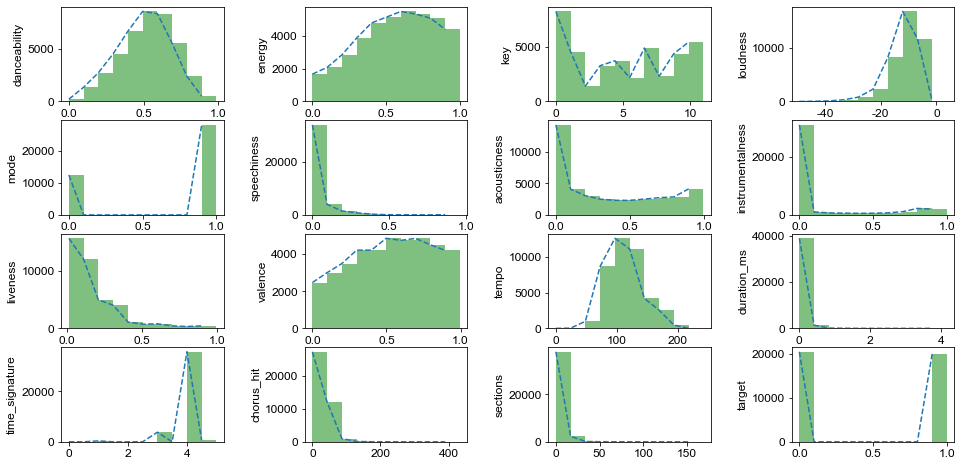

In [40]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
    
plt.figure(figsize=(16, 8))

x_dim = data.shape[0]
y_dim = data.shape[1]

for i in range(4,y_dim-1):
    plt.subplot(4,4,i-3)
    n, bins, patches = plt.hist(data.iloc[:,i],bins=10,alpha=0.5,color='g')
    plt.ylabel(data.columns[i])
    plt.plot(bins[:-1], n, '--')

plt.subplots_adjust(wspace=0.5)
plt.show()

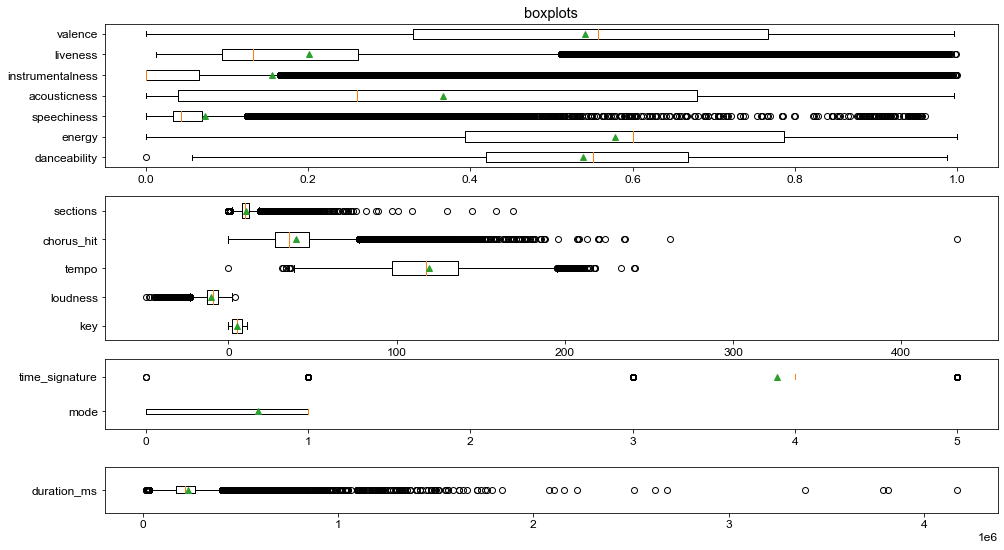

In [41]:
fig2 = plt.figure(figsize=(16,9))
plt.subplot(3,1,1)
box_1, box_2, box_3, box_4, box_5, box_6, box_7 = data['danceability'], data['energy'], data['speechiness'], data['acousticness'],data['instrumentalness'],data['liveness'],data['valence']
plt.title('boxplots')
labels = 'danceability', 'energy', 'speechiness', 'acousticness','instrumentalness','liveness','valence'
plt.boxplot([box_1, box_2, box_3, box_4, box_5, box_6, box_7], labels=labels, vert=False, showmeans=True)

plt.subplot(3, 1, 2)
box_1, box_2, box_3, box_4, box_5 = data['key'], data['loudness'], data['tempo'], data['chorus_hit'], data['sections']
labels = 'key', 'loudness', 'tempo', 'chorus_hit', 'sections'
plt.boxplot([box_1, box_2, box_3, box_4, box_5], labels=labels, vert=False, showmeans=True)

plt.subplot(6, 1, 5)
box_1, box_2= data['mode'], data['time_signature']
labels = 'mode', 'time_signature'
plt.boxplot([box_1, box_2], labels=labels, vert=False, showmeans=True)

plt.subplot(9, 1, 9)
plt.boxplot(data['duration_ms'], labels=['duration_ms'], vert=False, showmeans=True)

plt.show()

### Heatmap

In [42]:
def plotCorrelationMatrix(df, graphWidth):
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

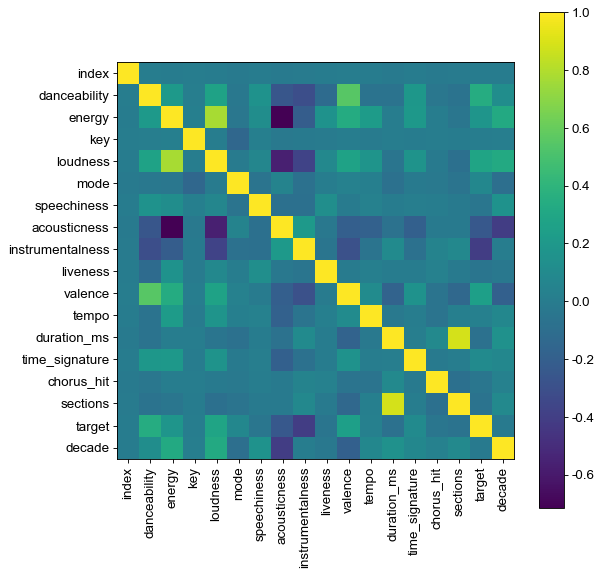

In [43]:
plotCorrelationMatrix(data, 8)

In [44]:
# import seaborn as sns
# sns.pairplot(data=data.loc[data['decade'] == 2010].drop(['track', 'artist', 'uri','decade'], axis=1), hue='target')
# plt.show()

In [45]:
print(data.corr()['target'])
neg_corr_list = []
for key in data.corr()['target'].keys():
    if data.corr()['target'][key] < 0:
        neg_corr_list.append(key)
print(neg_corr_list)
small_corr_list = ['key','speechiness','tempo','chorus_hit','decade','sections','liveness']

index               0.003867
danceability        0.346190
energy              0.175873
key                 0.010188
loudness            0.284600
mode                0.079726
speechiness        -0.040446
acousticness       -0.244237
instrumentalness   -0.405705
liveness           -0.050802
valence             0.251273
tempo               0.032931
duration_ms        -0.075438
time_signature      0.104120
chorus_hit         -0.045273
sections           -0.061344
target              1.000000
decade             -0.005724
Name: target, dtype: float64
['speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms', 'chorus_hit', 'sections', 'decade']


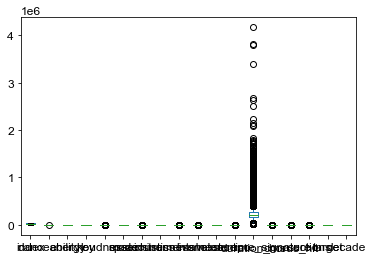

In [46]:
data.plot.box()
plt.show()

### Principle Component Analysis

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

hit_flop = data['target'].values
drop_list = ['track', 'artist', 'uri','target']
#drop_list += neg_corr_list
drop_list += small_corr_list
features = data.drop(drop_list, axis=1).values

scalar = StandardScaler()
scalar.fit(features)
features = scalar.transform(features)

pca = PCA(n_components=2)
pca.fit(features)
pca_res = pca.transform(features)

In [48]:
pca_res

array([[-1.05325937,  0.32109142],
       [ 5.68073532,  1.12600765],
       [-1.4010434 , -0.19086568],
       ...,
       [ 3.47313989, -0.58573303],
       [ 0.77767176, -1.24677983],
       [-0.01501265,  3.2741458 ]])

In [49]:
def classification_plot(res, hit_flop):
    x = res[:,0]
    y = res[:,1]
    for i in range(2):
        plt.scatter(x[np.where(hit_flop==i)], y[np.where(hit_flop==i)] , s=50,  alpha=0.5)
    plt.legend(['flop','hit'])
    plt.show()

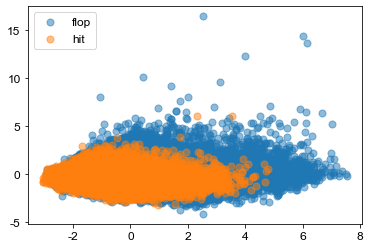

In [50]:
classification_plot(pca_res, hit_flop)

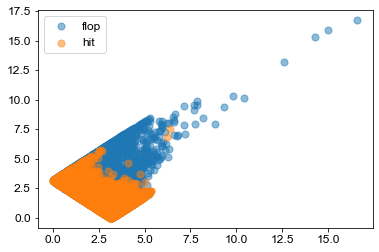

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(pca_res)
kmeans_res = kmeans.transform(pca_res)
classification_plot(kmeans_res, hit_flop)

## Construct Artist Graph

In [52]:
import networkx as nx
from collections import Counter
import math

In [53]:
def print_network_statistics (net):
    nodes = len(net.nodes())
    edges = len(net.edges())
    density = nx.density(net)
    transitivity = nx.transitivity(net)
    average_clustering_coefficient = nx.average_clustering(net)

    print (f'=== Network statistics ===')
    print (f'Number of nodes: {nodes}')
    print (f'Number of edges: {edges}')
    print (f'Network density: {density:.4f}')
    print (f'Transitivity: {transitivity:.4f}')
    print (f'Average Clustering Coefficient: {average_clustering_coefficient:.4f}')
    print (f'======')

def plot_degree_distribution (net, color='r'):
    degree_sequence = np.array(net.degree())
    degree_count = Counter(degree_sequence[:,1])
    degree_list = []
    for k,v in degree_count.items():
        degree_list.append([int(k),int(v)])
    degree_list.sort(key=(lambda x:x[0]))
    x_axis = [n[0] for n in degree_list]
    y_axis = [math.log(n[1]) for n in degree_list]        
    plt.plot(x_axis,y_axis)
    plt.xlabel ('Degree')
    plt.ylabel ('Number of nodes with degree')
    plt.title ('Degree distribution on log scale')

In [54]:
artist_node = []
artist_edge = []
artist_net = nx.Graph()
for dlist in data_artist['artist']:
    for i, d in enumerate(dlist):
        if (d not in artist_node):
            artist_node.append(d)
            artist_net.add_node(d)
        for j in range(len(dlist[i+1:-1])):
            if [d, dlist[j]] not in artist_edge and [dlist[j],d] not in artist_edge:
                artist_edge.append([d, dlist[j]])
                artist_net.add_edge(d, dlist[j])

In [55]:
print_network_statistics(artist_net)

=== Network statistics ===
Number of nodes: 12133
Number of edges: 166
Network density: 0.0000
Transitivity: 0.2364
Average Clustering Coefficient: 0.0009


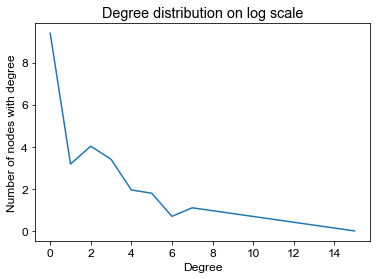

In [56]:
plot_degree_distribution (artist_net, color='b')

## Baselines: Logistic Regression, Decision Tree, SVM, Neural Networks, Random Forest

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 

def get_training_data(data, rd_state=1):
    drop_list = ['track', 'artist', 'uri', 'target']
    X = data.drop(drop_list, axis=1)
    y = data['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=rd_state)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    return X_train, X_test, y_train, y_test

def get_target(data):
    drop_list = ['track', 'artist', 'uri', 'target']
    X = data.drop(drop_list, axis=1)
    y = data['target']
    return X, y

In [58]:
#X_train, X_test, y_train, y_test = get_training_data(data)

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier()
}

# n = 5
# X_train, X_test, y_train, y_test = [], [], [], []

# for i in range(n):
#     X_tr, X_te, y_tr, y_te = get_training_data(data, i)
#     X_train.append(X_tr)
#     X_test.append(X_te)
#     y_train.append(y_tr)
#     y_test.append(y_te)
    
# for name, model in models.items():
#     accuracy, auc = [], []
#     for i in range(n):
#         model.fit(X_train[i], y_train[i])
#         predict = model.predict(X_test[i])
#         accuracy.append(accuracy_score(y_test[i], predict))
#         auc.append(roc_auc_score(y_test[i], predict))
#     print(accuracy, auc)
#     print(name + ": accuracy {:.2f}%".format(sum(accuracy)/len(accuracy) * 100) + ": AUC {:.2f}".format(sum(auc)/len(auc)))

X_train, X_test, y_train, y_test = get_training_data(data, 1)
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.


In [62]:
X, y = get_target(data)
from sklearn.model_selection import cross_val_score
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    print(name + " cross-validation accuracy: {:.2f}%".format(cv_scores.mean() * 100))

                   Logistic Regression cross-validation accuracy: 74.17%
                         Decision Tree cross-validation accuracy: 71.71%
Support Vector Machine (Linear Kernel) cross-validation accuracy: 74.03%
   Support Vector Machine (RBF Kernel) cross-validation accuracy: 79.49%
                        Neural Network cross-validation accuracy: 79.64%
                         Random Forest cross-validation accuracy: 79.97%


In [63]:
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
for name, model in models.items():
    predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, predict)

    auc = roc_auc_score(y_test, predict)
    precision = precision_score(y_test, predict)
    recall = recall_score(y_test, predict)
    F1 = f1_score(y_test,predict)
    print(name + ": accuracy {:.2f}%".format(accuracy * 100) + ", AUC {:.2f}".format(auc) + ", F1 {:.2f}".format(F1) + ", precision {:.2f}%".format(precision*100) + ", recall {:.2f}%".format(recall*100))

                   Logistic Regression: accuracy 73.81%, AUC 0.74, F1 0.75, precision 70.84%, recall 80.56%
                         Decision Tree: accuracy 71.08%, AUC 0.71, F1 0.71, precision 71.15%, recall 70.51%
Support Vector Machine (Linear Kernel): accuracy 73.80%, AUC 0.74, F1 0.76, precision 70.41%, recall 81.75%
   Support Vector Machine (RBF Kernel): accuracy 79.11%, AUC 0.79, F1 0.81, precision 74.98%, recall 87.11%
                        Neural Network: accuracy 79.52%, AUC 0.80, F1 0.81, precision 76.32%, recall 85.36%
                         Random Forest: accuracy 79.93%, AUC 0.80, F1 0.81, precision 77.32%, recall 84.47%
